In [251]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
% matplotlib inline

In [252]:
# a fuzzy set can be depicted in python as a set of tuples
a = set()
a.add((0.12, 1))
a.add((0.32, 2))
a.add((0.76, 3))
a.add((0.62, 4))
a.add((0.45, 5))

a

{(0.12, 1), (0.32, 2), (0.45, 5), (0.62, 4), (0.76, 3)}

In [253]:
b = set()
b.add((0.00, 1))
b.add((0.10, 2))
b.add((0.50, 3))
b.add((0.76, 4))
b.add((0.90, 5))

b

{(0.0, 1), (0.1, 2), (0.5, 3), (0.76, 4), (0.9, 5)}

In [254]:
def union(a, b):
    a = list(a)
    b = list(b)
    
    c = set()
    
    for i in a:
        element = i[1]
        j       = next((x for x in b if element == x[1]), (0, element))
        
        c.add((max(i[0], j[0]), element))
        
    return c

In [281]:
union(a, b)

{(0.5, 3), (0.76, 4), (0.9, 5), (1.0, 2)}

In [256]:
def intersect(a, b):
    a = list(a)
    b = list(b)
    
    c = set()
    
    for i in a:
        element = i[1]
        j       = next((x for x in b if element == x[1]), (0, element))
        
        c.add((min(i[0], j[0]), element))
        
    return c

In [257]:
intersect(a, b)

{(0.0, 1), (0.1, 2), (0.45, 5), (0.5, 3), (0.62, 4)}

In [258]:
def complement(x):
    y = set()
    
    for i in x:
        i = (1.0 - i[0], i[1])
        y.add(i)
        
    return y

In [259]:
complement(a)

{(0.24, 3), (0.38, 4), (0.55, 5), (0.6799999999999999, 2), (0.88, 1)}

In [260]:
complement(b)

{(0.09999999999999998, 5), (0.24, 4), (0.5, 3), (0.9, 2), (1.0, 1)}

In [261]:
def minus(a, b):
    return intersect(a, complement(b))

In [262]:
minus(a, b)

{(0.09999999999999998, 5), (0.12, 1), (0.24, 4), (0.32, 2), (0.5, 3)}

In [263]:
def plot(plots):
    sets, legends = list(zip(*plots))
    
    for i in sets:
        y, x = list(zip(*i))
        f    = interp1d(x, y, kind = 'cubic')
        
        x    = np.linspace(min(x), max(x), 10000)
        plt.plot(x, f(x), '--')
        
    plt.legend(legends)
    plt.grid()

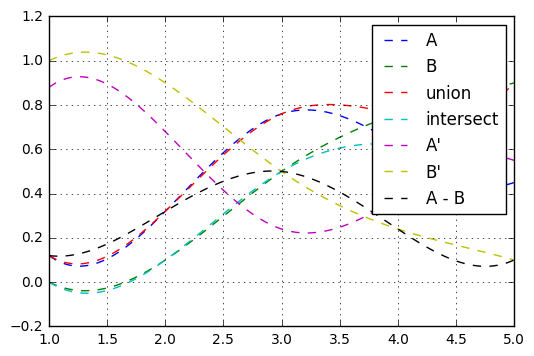

In [264]:
plot([(a, 'A'),
      (b, 'B'),
      (union(a, b), 'union'),
      (intersect(a, b), 'intersect'),
      (complement(a), "A'"),
      (complement(b), "B'"),
      (minus(a, b), 'A - B')])

In [265]:
c = set()
c.add((0.10, 1))
c.add((0.31, 3))
c.add((0.70, 4))
c.add((0.98, 5))

c

{(0.1, 1), (0.31, 3), (0.7, 4), (0.98, 5)}

In [266]:
# checking the possibility of DeMorgan's Law
def demorgan(a, b):
    lhs = complement(union(a, b))
    rhs = intersect(complement(a), complement(b))
    print("~(A U B): " + str(lhs))
    print("~ A ∩ ~B: " + str(rhs))
    
    return lhs == rhs

In [267]:
demorgan(a, b)

~(A U B): {(0.88, 1), (0.24, 3), (0.09999999999999998, 5), (0.6799999999999999, 2), (0.24, 4)}
~ A ∩ ~B: {(0.88, 1), (0.24, 3), (0.09999999999999998, 5), (0.6799999999999999, 2), (0.24, 4)}


True

In [268]:
def associative(a, b, c, function):
    lhs = function(a, function(b, c))
    rhs = function(function(a, b), c)
    
    print("A x (B x C): " + str(lhs))
    print("(A x B) x C: " + str(rhs))
    
    return lhs == rhs

In [269]:
associative(a, b, c, union)

A x (B x C): {(0.12, 1), (0.76, 3), (0.98, 5), (0.32, 2), (0.76, 4)}
(A x B) x C: {(0.12, 1), (0.76, 3), (0.98, 5), (0.32, 2), (0.76, 4)}


True

In [270]:
associative(a, b, c, intersect)

A x (B x C): {(0.0, 1), (0.31, 3), (0.45, 5), (0, 2), (0.62, 4)}
(A x B) x C: {(0.0, 1), (0.31, 3), (0.45, 5), (0, 2), (0.62, 4)}


True

In [271]:
def distributive(a, b, c, fa, fb):
    lhs = fb(fa(a, b), c)
    rhs = fa(fb(a, c), fb(b, c))
    
    print("(A x B) y C)     : " + str(lhs))
    print("(A x C) y (B x C): " + str(rhs))
    
    return lhs == rhs

In [272]:
distributive(a, b, c, union, intersect)

(A x B) y C)     : {(0.1, 1), (0.31, 3), (0.9, 5), (0, 2), (0.7, 4)}
(A x C) y (B x C): {(0.1, 1), (0.31, 3), (0.9, 5), (0, 2), (0.7, 4)}


True

In [273]:
distributive(a, b, c, intersect, union)

(A x B) y C)     : {(0.1, 1), (0.5, 3), (0.98, 5), (0.1, 2), (0.7, 4)}
(A x C) y (B x C): {(0.1, 1), (0.5, 3), (0.98, 5), (0.1, 2), (0.7, 4)}


True

In [274]:
def commutative(a, b, function):
    lhs = function(a, b)
    rhs = function(b, a)
    
    print("A x B: " + str(lhs))
    print("B x A: " + str(rhs))
    
    return lhs == rhs

In [275]:
commutative(a, b, union)

A x B: {(0.12, 1), (0.76, 3), (0.9, 5), (0.32, 2), (0.76, 4)}
B x A: {(0.12, 1), (0.76, 3), (0.9, 5), (0.32, 2), (0.76, 4)}


True

In [276]:
commutative(a, b, intersect)

A x B: {(0.0, 1), (0.5, 3), (0.45, 5), (0.1, 2), (0.62, 4)}
B x A: {(0.0, 1), (0.5, 3), (0.45, 5), (0.1, 2), (0.62, 4)}


True

In [277]:
# a fuzzy set can be depicted in python as a set of tuples
a = set()
a.add((1.00, 2))
a.add((0.50, 3))
a.add((0.30, 4))
a.add((0.20, 5))

a

{(0.2, 5), (0.3, 4), (0.5, 3), (1.0, 2)}

In [278]:
def extension(x, function):
    y = set()
    
    for i in x:
        y.add((i[0], function(i[1])))
        
    return y

In [279]:
extension(a, lambda x: np.power(x, 2)) # adding the extension principle for f(x) = x^2

{(0.2, 25), (0.3, 16), (0.5, 9), (1.0, 4)}

In [280]:
extension(a, lambda x: x + 20) # adding the extension principle for f(x) = x + 20

{(0.2, 25), (0.3, 24), (0.5, 23), (1.0, 22)}